In [1]:
from sklearn.datasets import load_digits
digits=load_digits()
print(digits)

{'images': array([[[  0.,   0.,   5., ...,   1.,   0.,   0.],
        [  0.,   0.,  13., ...,  15.,   5.,   0.],
        [  0.,   3.,  15., ...,  11.,   8.,   0.],
        ..., 
        [  0.,   4.,  11., ...,  12.,   7.,   0.],
        [  0.,   2.,  14., ...,  12.,   0.,   0.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   5.,   0.,   0.],
        [  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   3., ...,   6.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   0., ...,  10.,   0.,   0.]],

       [[  0.,   0.,   0., ...,  12.,   0.,   0.],
        [  0.,   0.,   3., ...,  14.,   0.,   0.],
        [  0.,   0.,   8., ...,  16.,   0.,   0.],
        ..., 
        [  0.,   9.,  16., ...,   0.,   0.,   0.],
        [  0.,   3.,  13., ...,  11.,   5.,   0.],
        [  0.,   0.,   0., ...,  16.,   9.,   0.]],

       ..., 
       [[ 

In [2]:
digits.images.shape

(1797, 8, 8)

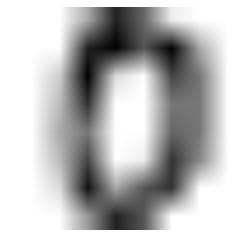

In [6]:
# 画像描画に必要なライブラリの読み込み
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 軸を削除
plt.axis('off')
#1番目の画像を出力する、引数には2次元のデータを渡す
plt.imshow(digits.images[0],cmap='gray_r')
plt.show()

In [8]:
digits.data.shape

(1797, 64)

In [9]:
print(digits.target)

[0 1 2 ..., 8 9 8]


In [10]:
# データセットの準備と前処理

In [11]:
from sklearn.cross_validation import train_test_split

X=digits.data
y=digits.target
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=0)

In [14]:
# ここからk近傍法
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
y_test_pred=knn.predict(Xtest)

In [17]:
# 正答率の確認
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test_pred, ytest)
print('トレーニングデータ正答率:', str(score))

トレーニングデータ正答率: 0.981481481481


In [18]:
# 1次元で表現されているデータを2次元に直す
print(Xtest.shape)
X_test_images=Xtest.reshape(540,8,8)
print(X_test_images.shape)

(540, 64)
(540, 8, 8)


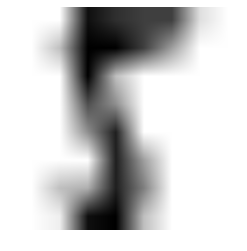

In [19]:
# テストデータの上から10個の画像と予測結果を並べて出力する
for i in range (10):
    plt.axis('off')
    plt.imshow(X_test_images[i],cmap='gray_r')
    